In [1]:
import pandas as pd

In [27]:
df = pd.read_csv('processed_news_dataset.csv')
df.head()
df.info()
len(df)
len(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        25000 non-null  object
 1   label       25000 non-null  object
 2   clean_text  24653 non-null  object
dtypes: object(3)
memory usage: 586.1+ KB


3

In [3]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, accuracy_score 
import joblib

In [4]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, min_df=5, max_df=0.9)
X = tfidf.fit_transform(df['text']) 
y = df['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
nb_model = MultinomialNB() 
nb_model.fit(X_train, y_train) 
nb_preds = nb_model.predict(X_test)

print("📘 Naive Bayes Results:") 
print(classification_report(y_test, nb_preds))
print("Accuracy:", accuracy_score(y_test, nb_preds))

📘 Naive Bayes Results:
              precision    recall  f1-score   support

        fake       0.94      0.95      0.94      2566
        real       0.94      0.94      0.94      2434

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000

Accuracy: 0.9434


In [7]:
# Define user_input
user_input = "A new education bill passed by Parliament ensures free textbooks for students in rural schools starting next academic year."

# Transform using TF-IDF vectorizer
vector = tfidf.transform([user_input])

# Predict using trained model
prediction = nb_model.predict(vector)[0]


probas = nb_model.predict_proba(vector)[0]

print("📰 Input News:")
print(user_input)
print("\n🔍 Prediction:", prediction.upper())
print("📊 Confidence:")
print(f"   - Real: {probas[list(nb_model.classes_).index('real')]:.4f}")
print(f"   - Fake: {probas[list(nb_model.classes_).index('fake')]:.4f}")

📰 Input News:
A new education bill passed by Parliament ensures free textbooks for students in rural schools starting next academic year.

🔍 Prediction: REAL
📊 Confidence:
   - Real: 0.7069
   - Fake: 0.2931


In [8]:
fake_texts = df[df['label'] == 'fake']['clean_text'].tolist()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


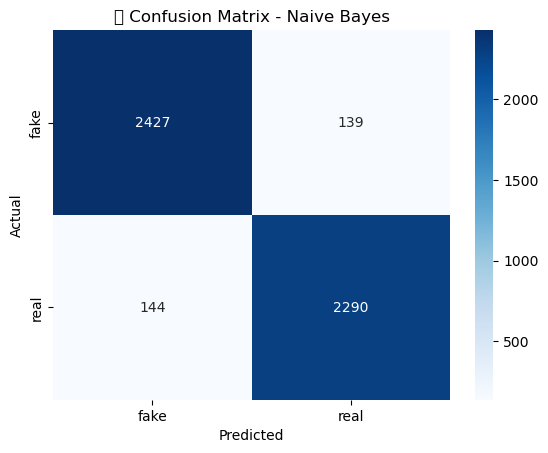

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, nb_preds, labels=nb_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('🔍 Confusion Matrix - Naive Bayes')
plt.show()


/var/folders/zj/lf_s1zw54s16mjdj12y6p0k00000gn/T/ipykernel_1442/3375085795.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


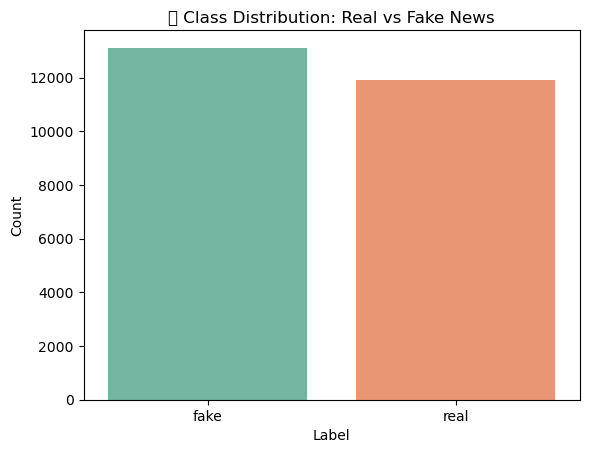

In [12]:
sns.countplot(data=df, x='label', palette='Set2')
plt.title('📊 Class Distribution: Real vs Fake News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [13]:
#SENTIMENT ANALYSIS AND ADVISORY

In [14]:
!pip install vaderSentiment

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier  # Changed from MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [16]:
# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment for each news text
def get_sentiment(text):
    vs = analyzer.polarity_scores(text)
    return pd.Series({
        'vader_neg': vs['neg'],
        'vader_neu': vs['neu'],
        'vader_pos': vs['pos'],
        'vader_compound': vs['compound']
    })

# Apply sentiment analysis
sentiment_features = df['text'].apply(get_sentiment)
df = pd.concat([df, sentiment_features], axis=1)

# Show sample
df[['text', 'label', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']].head()

,text,label,vader_neg,vader_neu,vader_pos,vader_compound
0,"Donald Trump s White House is in chaos, and th...",fake,0.153,0.781,0.067,-0.9872
1,Now that Donald Trump is the presumptive GOP n...,fake,0.105,0.802,0.094,-0.8544
2,Mike Pence is a huge homophobe. He supports ex...,fake,0.092,0.847,0.061,-0.8691
3,SAN FRANCISCO (Reuters) - California Attorney ...,real,0.000,0.984,0.016,0.1154
4,Twisted reasoning is all that comes from Pelos...,fake,0.036,0.884,0.080,0.6538


/var/folders/zj/lf_s1zw54s16mjdj12y6p0k00000gn/T/ipykernel_1442/219780386.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='vader_compound', data=df, palette='Set2')
/var/folders/zj/lf_s1zw54s16mjdj12y6p0k00000gn/T/ipykernel_1442/219780386.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='vader_pos', data=df, palette='Set2')
/var/folders/zj/lf_s1zw54s16mjdj12y6p0k00000gn/T/ipykernel_1442/219780386.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='vader_neg', data=df, palette='Set2')


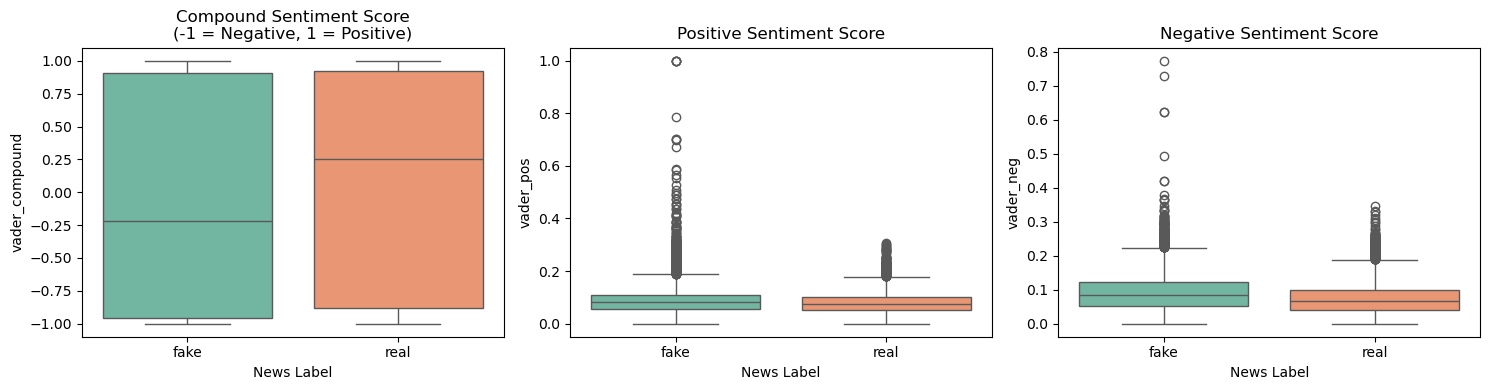

In [17]:
plt.figure(figsize=(15, 4))

# Compound Score
plt.subplot(1, 3, 1)
sns.boxplot(x='label', y='vader_compound', data=df, palette='Set2')
plt.title('Compound Sentiment Score\n(-1 = Negative, 1 = Positive)')
plt.xlabel('News Label')

# Positive Sentiment
plt.subplot(1, 3, 2)
sns.boxplot(x='label', y='vader_pos', data=df, palette='Set2')
plt.title('Positive Sentiment Score')
plt.xlabel('News Label')

# Negative Sentiment
plt.subplot(1, 3, 3)
sns.boxplot(x='label', y='vader_neg', data=df, palette='Set2')
plt.title('Negative Sentiment Score')
plt.xlabel('News Label')

plt.tight_layout()
plt.show()

📘 Enhanced Model Results (with VADER Sentiment):
              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      2566
        real       0.99      1.00      1.00      2434

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Accuracy: 0.9956


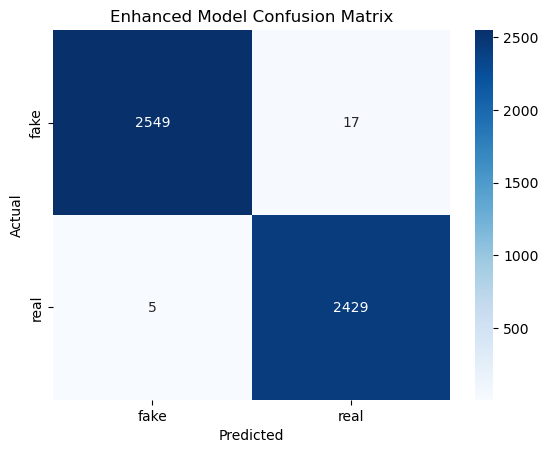

📘 MultinomialNB Enhanced Model Results (with VADER Sentiment):
              precision    recall  f1-score   support

        fake       0.95      0.95      0.95      2566
        real       0.94      0.94      0.94      2434

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000

Accuracy: 0.9438


In [18]:
# TF-IDF Features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, min_df=5, max_df=0.9)
X_text = tfidf.fit_transform(df['text'])

# Normalize sentiment features to be between 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_sentiment = scaler.fit_transform(df[['vader_compound', 'vader_pos', 'vader_neg', 'vader_neu']])

# Combine features
import numpy as np
X_combined = np.hstack((X_text.toarray(), X_sentiment))


X_combined = np.clip(X_combined, a_min=0, a_max=None)

# Labels
y = df['label']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Using RandomForest (no change here)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate RandomForest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("📘 Enhanced Model Results (with VADER Sentiment):")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, 
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Enhanced Model Confusion Matrix')
plt.show()


from sklearn.naive_bayes import MultinomialNB

nb_model_enhanced = MultinomialNB()
nb_model_enhanced.fit(X_train, y_train)
y_pred_nb = nb_model_enhanced.predict(X_test)

# Evaluate MultinomialNB
print("📘 MultinomialNB Enhanced Model Results (with VADER Sentiment):")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

In [19]:
def analyze_news_with_advisory(user_input):
    # Transform text
    text_features = tfidf.transform([user_input])
    
    # Get and scale sentiment
    sentiment = analyzer.polarity_scores(user_input)
    sentiment_features = scaler.transform([[sentiment['compound'], 
                                         sentiment['pos'],
                                         sentiment['neg'],
                                         sentiment['neu']]])
    
    # Combine features
    combined_features = np.hstack((text_features.toarray(), sentiment_features))
    
    # Predict
    prediction = model.predict(combined_features)[0]
    probas = model.predict_proba(combined_features)[0]
    real_prob = probas[list(model.classes_).index('real')]
    fake_prob = probas[list(model.classes_).index('fake')]
    
    # Generate advisory
    advisory = []
    
    # Prediction analysis
    if prediction == 'fake':
        advisory.append("⚠️ Warning: High probability of fake news detected")
        if fake_prob > 0.7:
            advisory.append(f"🔍 Confidence: {fake_prob:.0%} likelihood of being fake")
    else:
        advisory.append("✅ Likely credible content")
        if real_prob < 0.7:
            advisory.append("🤔 Moderate confidence in this assessment")
    
    # Sentiment analysis
    compound = sentiment['compound']
    if compound >= 0.05:
        advisory.append(f"😊 Positive sentiment (score: {compound:.2f})")
    elif compound <= -0.05:
        advisory.append(f"😠 Negative sentiment (score: {compound:.2f})")
    else:
        advisory.append(f"😐 Neutral sentiment (score: {compound:.2f})")
    
    # Emotional intensity warning
    if abs(compound) > 0.5:
        advisory.append("💢 High emotional content - common in misleading information")
    
    # Final recommendations
    advisory.append("\n📌 Recommendations:")
    if prediction == 'fake':
        advisory.append("- Verify with trusted fact-checking websites")
        advisory.append("- Check the source's reputation and history")
    else:
        advisory.append("- Still recommend verifying with multiple sources")
    
    # Print results
    print("📰 News Analysis Results:")
    print("\n".join(advisory))
    print(f"\nPrediction: {prediction.upper()} (Real: {real_prob:.1%}, Fake: {fake_prob:.1%})")
    print(f"Sentiment: Compound={compound:.2f} (neg={sentiment['neg']:.2f}, neu={sentiment['neu']:.2f}, pos={sentiment['pos']:.2f})")
    
    return {
        'prediction': prediction,
        'confidence': {'real': real_prob, 'fake': fake_prob},
        'sentiment': sentiment
    }

In [20]:
# Example 1 - Likely fake news
example1 = "BREAKING: Secret documents prove COVID vaccines contain microchips! Government tracking everyone who got vaccinated!"
analyze_news_with_advisory(example1)

# Example 2 -
example2 = "The FDA announced updated guidelines for vaccine boosters based on new clinical trial data showing increased effectiveness."
analyze_news_with_advisory(example2)

# Example 3 - Borderline case
example3 = "Some experts express concerns about the long-term effects of the new policy, though most agree the short-term benefits are clear."
analyze_news_with_advisory(example3)

📰 News Analysis Results:
⚠️ Warning: High probability of fake news detected
🔍 Confidence: 85% likelihood of being fake
😐 Neutral sentiment (score: 0.00)

📌 Recommendations:
- Verify with trusted fact-checking websites
- Check the source's reputation and history

Prediction: FAKE (Real: 15.0%, Fake: 85.0%)
Sentiment: Compound=0.00 (neg=0.00, neu=1.00, pos=0.00)
📰 News Analysis Results:
⚠️ Warning: High probability of fake news detected
🔍 Confidence: 90% likelihood of being fake
😊 Positive sentiment (score: 0.27)

📌 Recommendations:
- Verify with trusted fact-checking websites
- Check the source's reputation and history

Prediction: FAKE (Real: 10.0%, Fake: 90.0%)
Sentiment: Compound=0.27 (neg=0.00, neu=0.88, pos=0.12)
📰 News Analysis Results:
⚠️ Warning: High probability of fake news detected
🔍 Confidence: 93% likelihood of being fake
😊 Positive sentiment (score: 0.79)
💢 High emotional content - common in misleading information

📌 Recommendations:
- Verify with trusted fact-checking web

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


{'prediction': 'fake',
 'confidence': {'real': 0.07, 'fake': 0.93},
 'sentiment': {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.7902}}